### <b>Thomson Sampling - Reinforcement Learning - Author of algorithm: William Robin Thompson</b>

#### <b style="color: green">Multi-armed bandit problem</b>

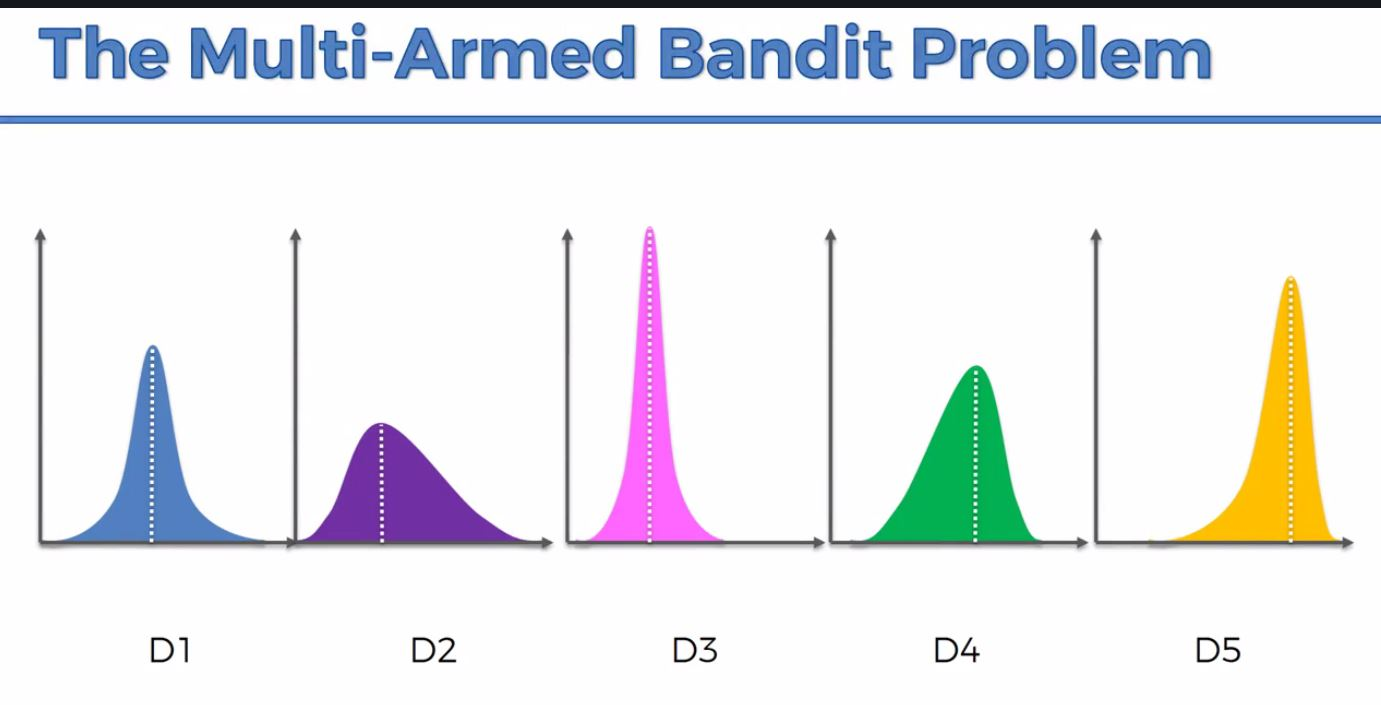
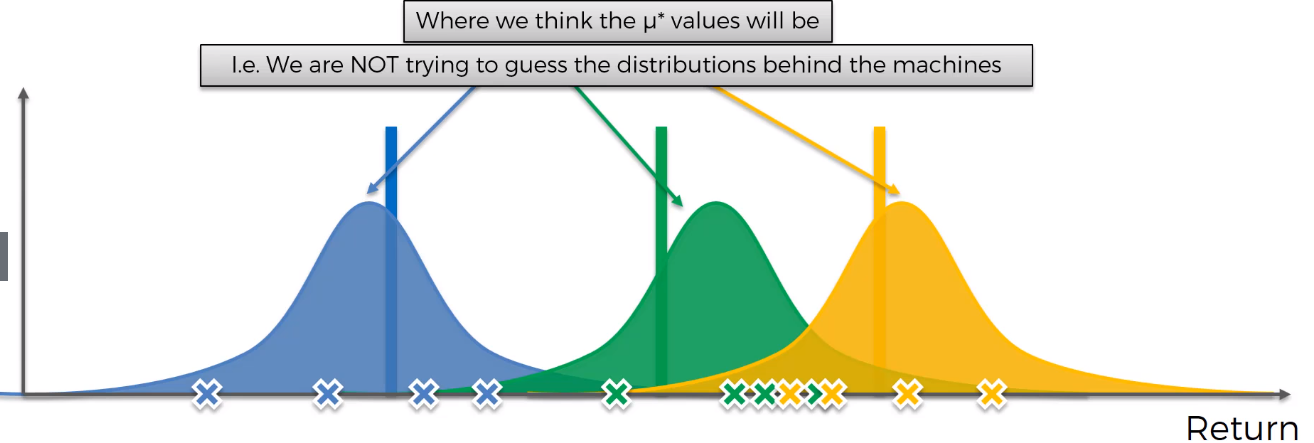
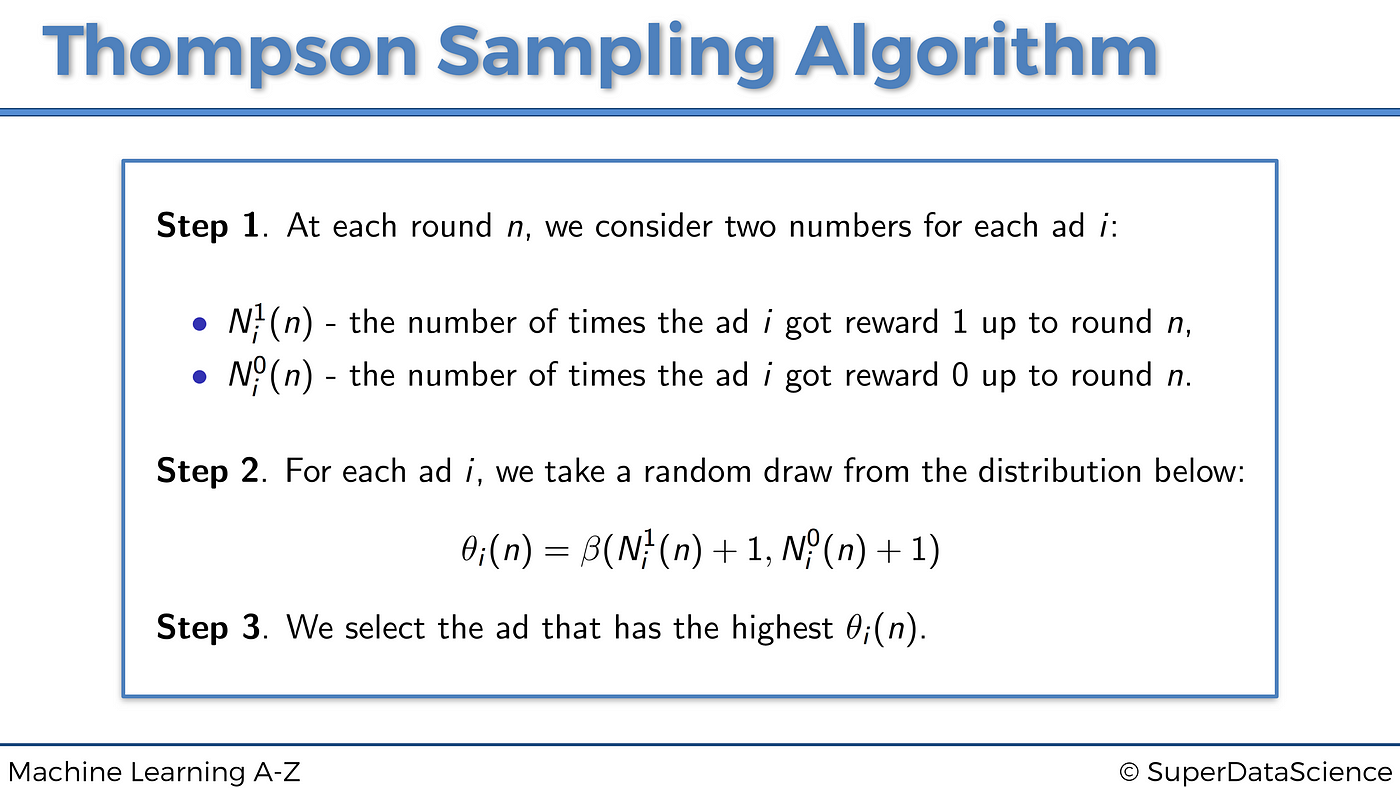
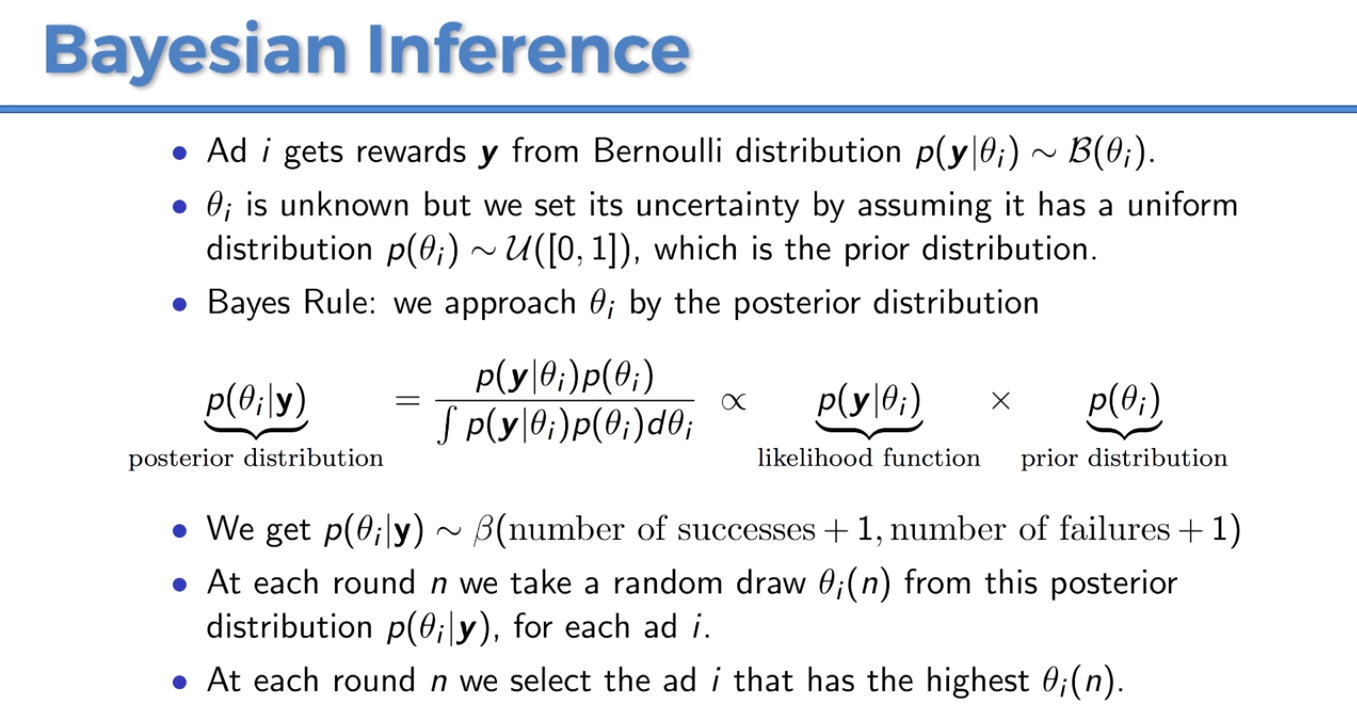
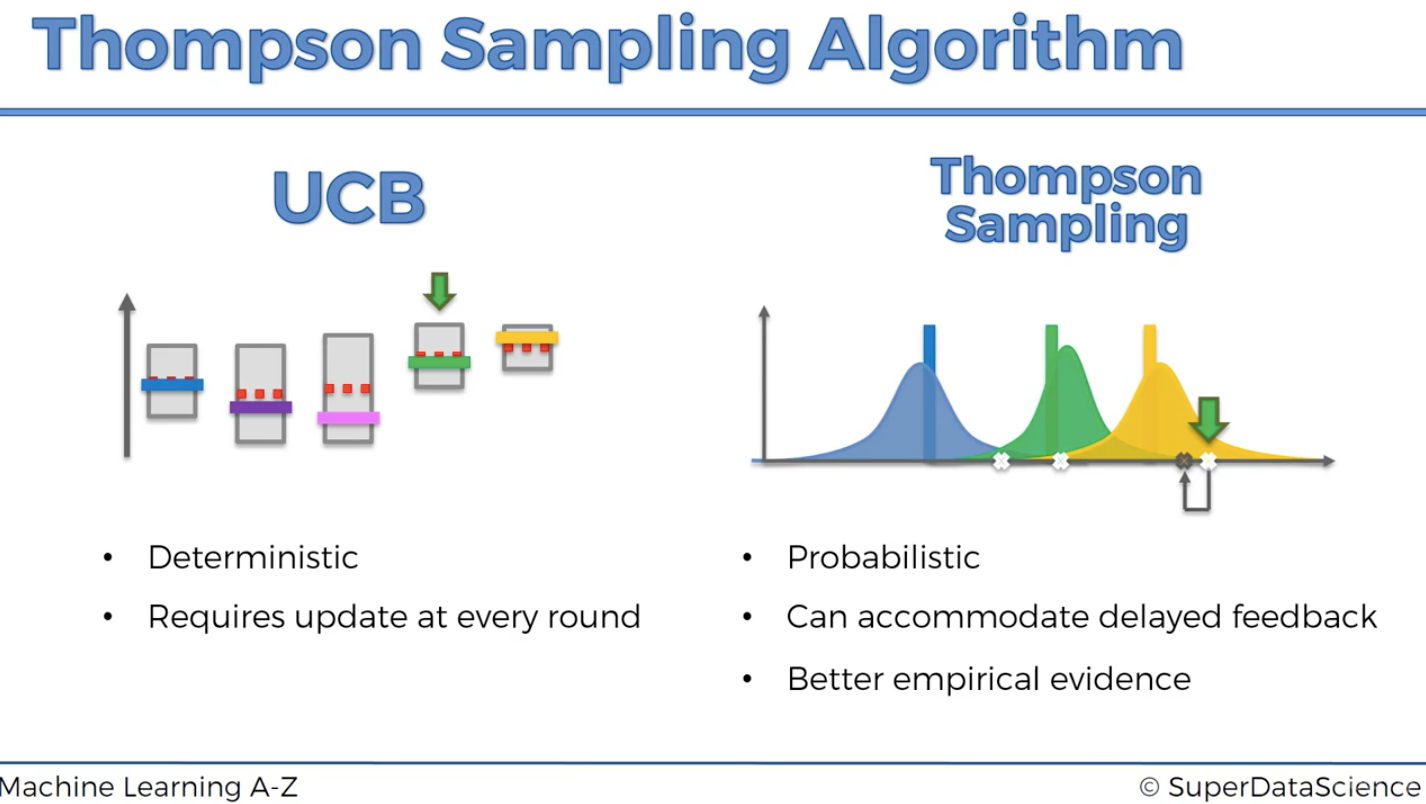
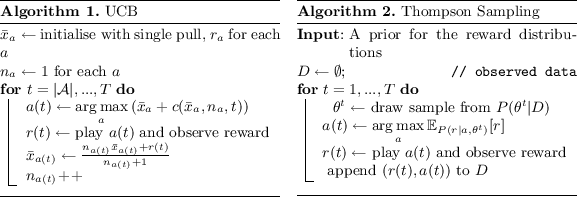

### <b>Loading/importing libraries</b>

In [56]:
import pandas as pd
import random
import matplotlib.pyplot as plt

### <b>Data preprocessing</b>

In [57]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

print(f"Dataset: \n{dataset}\n")

Dataset: 
      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]



### <b>Implementing Thompson Sampling Algorithm</b>

In [58]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

### <b>Visualizing the results of Thompson Sampling Algorithm by using Histogram chart</b>

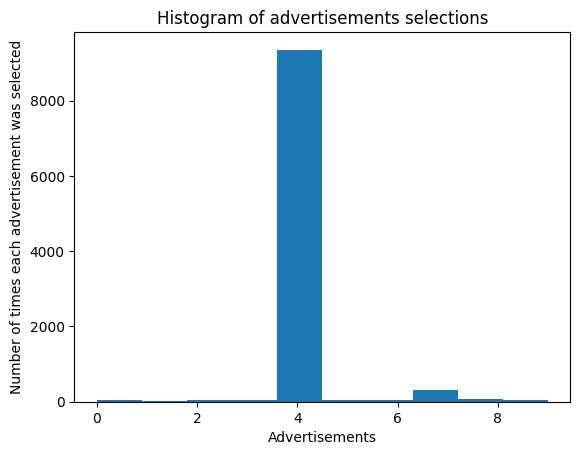

In [59]:
plt.hist(ads_selected)
plt.title("Histogram of advertisements selections")
plt.xlabel("Advertisements")
plt.ylabel("Number of times each advertisement was selected")
plt.show()